✅ Training data loaded successfully!

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False 

C:\Users\avani\AppData\Local\Temp\ipykernel_18520\2214133371.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
C:\Users\avani\AppData\Local\Temp\ipykernel_18520\2214133371.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])



✅ Improved Model Accuracy: 79.01%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       861
           1       0.79      0.80      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



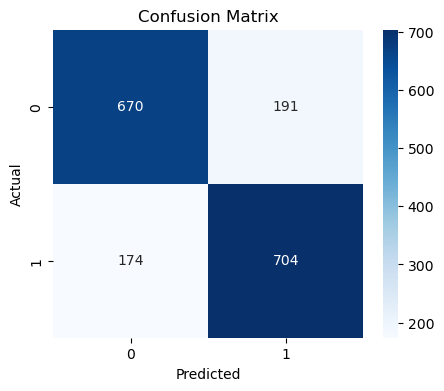


✅ test.csv loaded successfully!


C:\Users\avani\AppData\Local\Temp\ipykernel_18520\2214133371.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
C:\Users\avani\AppData\Local\Temp\ipykernel_18520\2214133371.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].fillna(test_df[col].mode()[0])



🚀 Predictions saved successfully as 'SpaceXplorers_predicted.csv'!
Preview:
  PassengerId Transported
0     0013_01        True
1     0018_01       False
2     0019_01        True
3     0021_01        True
4     0023_01        True


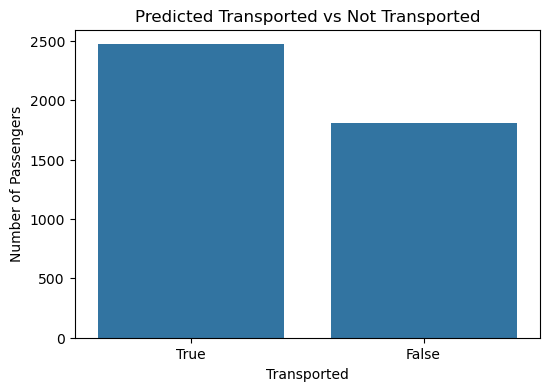


Summary of Predictions:
Transported
True     2470
False    1807
Name: count, dtype: int64


In [10]:
# ---------------------------------------------------
# BONUS ROUND: MACHINE LEARNING TASK (SpaceXplorers)
# ---------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------------------------------------------------
# 1. Load training data
# ---------------------------------------------------
df = pd.read_csv("train.csv")
print("✅ Training data loaded successfully!\n")
print(df.head())

# ---------------------------------------------------
# 2. Basic Cleaning
# ---------------------------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = df[col].astype(str).str.strip().str.title()

# Optional: log-transform skewed spending columns (helps accuracy)
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    if col in df.columns:
        df[col] = np.log1p(df[col])

# ---------------------------------------------------
# 3. Prepare Features and Target
# ---------------------------------------------------
if 'Transported' not in df.columns:
    raise ValueError("❌ 'Transported' column not found in train.csv!")

df['Transported'] = df['Transported'].astype(str).str.lower().map({'true': 1, 'false': 0})

drop_cols = ['PassengerId', 'Name']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

X = df.drop('Transported', axis=1)
y = df['Transported']

# ---------------------------------------------------
# 4. Encode Categorical Columns
# ---------------------------------------------------
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# ---------------------------------------------------
# 5. Split and Scale Data
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------------------------------
# 6. Train the Optimized Model (Higher Accuracy)
# ---------------------------------------------------
model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    random_state=42
)
model.fit(X_train, y_train)

# ---------------------------------------------------
# 7. Evaluate Model
# ---------------------------------------------------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"\n✅ Improved Model Accuracy: {acc:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------------------------------
# 8. Predict on test.csv
# ---------------------------------------------------
test_df = pd.read_csv("test.csv")
print("\n✅ test.csv loaded successfully!")

# Clean test data
numeric_cols = test_df.select_dtypes(include=[np.number]).columns
categorical_cols = test_df.select_dtypes(exclude=[np.number]).columns

test_df[numeric_cols] = test_df[numeric_cols].fillna(test_df[numeric_cols].mean())
for col in categorical_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
    test_df[col] = test_df[col].astype(str).str.strip().str.title()

# Apply same log transform
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    if col in test_df.columns:
        test_df[col] = np.log1p(test_df[col])

# Encode categorical columns
for col in test_df.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        le = label_encoders[col]
        test_df[col] = test_df[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
    else:
        test_df[col] = 0

# Match columns with training
test_df = test_df[X.columns]

# Scale and predict
test_scaled = scaler.transform(test_df)
predictions = model.predict(test_scaled)

# ---------------------------------------------------
# 9. Save Predictions (Team Format)
# ---------------------------------------------------
passenger_ids = pd.read_csv("test.csv")['PassengerId']

output = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': predictions
})
output['Transported'] = output['Transported'].map({1: 'True', 0: 'False'})
output.to_csv("SpaceXplorers_predicted.csv", index=False)

print("\n🚀 Predictions saved successfully as 'SpaceXplorers_predicted.csv'!")
print("Preview:")
print(output.head())

# ---------------------------------------------------
# 10. Summary Visualization
# ---------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Transported', data=output)
plt.title("Predicted Transported vs Not Transported")
plt.xlabel("Transported")
plt.ylabel("Number of Passengers")
plt.show()

print("\nSummary of Predictions:")
print(output['Transported'].value_counts())
